#### Задание

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
Разделите данные на выборку для обучения и тестирования  
Постройте модель LDA  
Визуализируйте предсказания для тестовой выборки и центры классов  
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris #импортируем датасет
from sklearn.model_selection import train_test_split #для разделения датасета на выборку для обучения и тестирования
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #импортируем LDA-функционал
from sklearn.metrics import accuracy_score # для расчета точности 
from sklearn.preprocessing import StandardScaler # для привода данных к единому масштаб
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()

In [30]:
#формируем датафрейм из загруженных данных
df = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target

In [31]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [32]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### LDA

In [46]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.30, random_state = 42)

In [50]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # обучаем данные
lda.predict(X_test) # делаем прогноз на тестовой выборке

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       0])

In [86]:
# смотрим точность прогноза
accuracy_score(y_test, lda.predict(X_test)) # расчет точности 

0.8444444444444444

In [56]:
lda.coef_  # коэффициенты дискриминатных линий

array([[-5.86740989,  8.53300115],
       [ 1.31353719, -3.78679337],
       [ 3.60240083, -3.36247786]])

In [61]:
# визуализируем предсказания для тестовой выборки и центры классов
small_train = X_train
small_test = X_test
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)
lda_small.means_ #центроиды

array([[4.96451613, 3.37741935],
       [5.86216216, 2.72432432],
       [6.55945946, 2.98648649]])

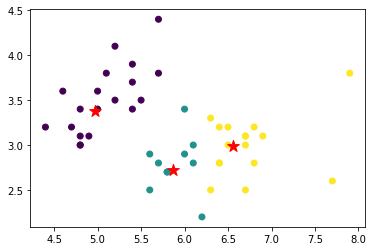

In [64]:
# визуализация разделения на тесте
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

#### Kmeans

In [73]:
# приведем данные к единому масштабу и сразу обучаем
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

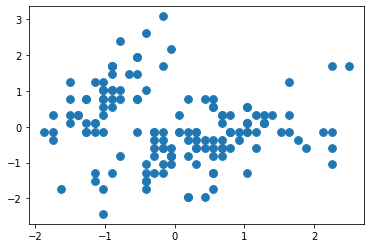

In [74]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1],cmap='autumn', s=60)

In [83]:
# подбираем оптимальное число кластеров методом "локтя"

k_inertia = [] # список для инерции
ks = range(1, 10) # диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(df_scaled)
    k_inertia.append(clf_kmeans.inertia_) # добавляем инерцию каждой модели в список

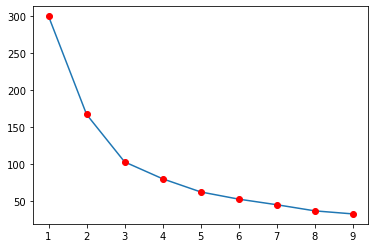

In [84]:
# строим график
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Оптимальным количеством видится 3, после него снижение замедляется

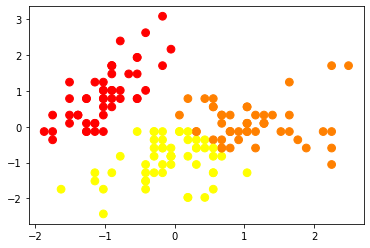

In [85]:
kmeans = KMeans(n_clusters=3) # явно указываем количество кластеров
clusters = kmeans.fit_predict(df_scaled) # fit_predict обучается на данных и каждому объекту присваивает кластер
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='autumn', c=clusters, s=60) # визуализируем полученную кластеризацию